In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 프로젝트 1차 EDA

 - 주제 : LOL 매치 데이터를 바탕으로 승패를 가려낼 수 있다.
     > 승패 예측에 중요한 변수를 가려낼 수 있다.

## 데이터셋

 - League of Legends(LOL) - Ranked Games 2020
 - challenger,grandmaster,master 108,000 game data
 - 데이터 출처 : https://www.kaggle.com/gyejr95/league-of-legendslol-ranked-games-2020-ver1
 
### 사용 데이터 설명
     - match_data_version1.pickle : 매치 관련 데이터
     - match_winner_data_version1.pickle : 승자 데이터
     - match_loser_data_version1.pickle : 패자 데이터

####  match 데이터

In [3]:
raw_df = pd.read_pickle('data/match_data_version1.pickle')
raw_df.shape

(108829, 14)

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
raw_df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,1585154663829.00,1323.00,4247263043.00,CLASSIC,MATCHED_GAME,10.6.314.4405,11.00,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.00,13.00,NaN,NaN
1,1585152108929.00,1317.00,4247155821.00,CLASSIC,MATCHED_GAME,10.6.314.4405,11.00,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.00,13.00,NaN,NaN
2,1585059026141.00,932.00,4243963257.00,CLASSIC,MATCHED_GAME,10.6.313.8894,11.00,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.00,13.00,NaN,NaN
3,1584977993720.00,2098.00,4241678498.00,CLASSIC,MATCHED_GAME,10.6.313.8894,11.00,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.00,13.00,NaN,NaN
4,1584973382886.00,2344.00,4241538868.00,CLASSIC,MATCHED_GAME,10.6.313.8894,11.00,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.00,13.00,NaN,NaN


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108829 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gameCreation           108829 non-null  float64
 1   gameDuration           108829 non-null  float64
 2   gameId                 108829 non-null  float64
 3   gameMode               108829 non-null  object 
 4   gameType               108829 non-null  object 
 5   gameVersion            108829 non-null  object 
 6   mapId                  108829 non-null  float64
 7   participantIdentities  108829 non-null  object 
 8   participants           108829 non-null  object 
 9   platformId             108829 non-null  object 
 10  queueId                108829 non-null  float64
 11  seasonId               108829 non-null  float64
 12  status.message         0 non-null       object 
 13  status.status_code     0 non-null       float64
dtypes: float64(7), object(7)
memory usage: 12

 * gameCreation : 게임 생성번호
 * gameDuration : 게임 진행시간 (단위 : 초)
 * gameId : 게임(매치) 고유값
 * gameMode : 게임 모드
 * gameType : 게임 종류 ??
 * gameVersion : 클라이언트의 버전
 * mapId : 맵 구분
 * participantIdentities : 플레이어 정보 (dict) 
 * participants : 플레이어 당 플레이 데이터 (dict)
 * platformId : 서버의 국가
 * queueId : 연결 상태?
 * seasonId : 시즌 번호
 * status.message : --
 * status.status_code : --

* gameCreation : 듀오나 솔로 등의 상태로 참여 시 생성되는 번호로 유추되나 이번 분석에서는 사용하지 않음

In [7]:
raw_df['gameCreation'].value_counts()

1581951842358.00    2
1582950142025.00    2
1580207383504.00    2
1584813541731.00    2
1584815530903.00    2
                   ..
1584958230195.00    1
1585079777402.00    1
1585090378931.00    1
1585091585323.00    1
1584505037879.00    1
Name: gameCreation, Length: 108770, dtype: int64

* gameDuration : 게임 지속 시간(초)으로 다음과 같은 구분점을 가짐
  - <= 400 : 180 초 이후 플레이어의 게임 참여 상황에 따라 게임을 초기화 할 수 있고, 게임이 성립되지 않아 종료된 게임으로 판단
  - 400 < x <= 1020 : 900초 이후 한 쪽의 항복 선언으로 게임 종료가 가능하고, 해당 투표가 2번까지 진행되는 1020초까지 단기에 결판난 게임으로 판단
  - < 1020 : 중장기전으로 분류

<AxesSubplot:>

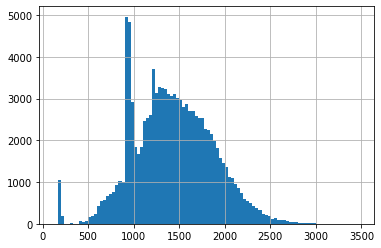

In [8]:
raw_df['gameDuration'].hist(bins = 100)

<AxesSubplot:>

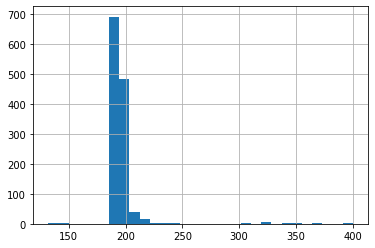

In [9]:
raw_df[raw_df['gameDuration'] <= 400]['gameDuration'].hist(bins = 30)

<AxesSubplot:>

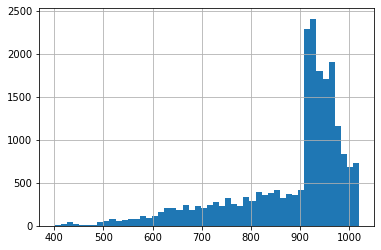

In [10]:
raw_df[(raw_df['gameDuration'] > 400) & (raw_df['gameDuration'] <= 1020)]['gameDuration'].hist(bins = 50)

* gameType : 단일 값으로 분석에 미사용

In [11]:
raw_df['gameType'].value_counts()

MATCHED_GAME    108829
Name: gameType, dtype: int64

* gameMode : 85%의 비중을 차지하는 CLASSIC 모드만 분석

In [12]:
raw_df['gameMode'].value_counts()

CLASSIC              92857
ARAM                 12061
URF                   2196
ONEFORALL             1575
KINGPORO               122
TUTORIAL_MODULE_1       12
TUTORIAL_MODULE_3        3
TUTORIAL_MODULE_2        3
Name: gameMode, dtype: int64

In [13]:
92857 / 108770 ## 클래식 모드만 남기는 걸로

0.8537004688792865

* mapId : 전체의 88.8% 에 해당하는 11 번 맵만 분석에 활용

In [14]:
raw_df['mapId'].value_counts() ## 88.8% 에 해당하는 11번 맵만 분석

11.00    96640
12.00    12183
10.00        6
Name: mapId, dtype: int64

In [15]:
96640 / 108829

0.887998603313455

In [16]:
raw_df['participantIdentities'][1]

[{'participantId': 1,
  'player': {'platformId': 'KR',
   'accountId': 'F23ggf384dqSm_YjnKOXZ6AzT9AIuXnBae39fTdobe-8k7dHMULcr139',
   'summonerName': 'LPL Player',
   'summonerId': 'H5upZv7VdqopzqhvJWsAyMPm4KiuqCH7PMBlc4QLW4UUQY4',
   'currentPlatformId': 'KR',
   'currentAccountId': 'F23ggf384dqSm_YjnKOXZ6AzT9AIuXnBae39fTdobe-8k7dHMULcr139',
   'matchHistoryUri': '/v1/stats/player_history/KR/2372714339454208',
   'profileIcon': 29}},
 {'participantId': 2,
  'player': {'platformId': 'KR',
   'accountId': 'k9fNBRC8yXeqIJg2X3Tq3Ko2YuxFUd4fRfFSqC0Glyyk3Ds',
   'summonerName': 'GIDE0N',
   'summonerId': 'VRJ3UE5P3xbH7fAWhVv8teJ3vEDmYmTv9TCq59iZRrxdld0',
   'currentPlatformId': 'KR',
   'currentAccountId': 'k9fNBRC8yXeqIJg2X3Tq3Ko2YuxFUd4fRfFSqC0Glyyk3Ds',
   'matchHistoryUri': '/v1/stats/player_history/KR/210316631',
   'profileIcon': 25}},
 {'participantId': 3,
  'player': {'platformId': 'KR',
   'accountId': 'bVwP9CQfYvmYu0L_U7p5NCo14wsHOoRfbrnpvGBBPyp32M0',
   'summonerName': 'supupsupu

In [17]:
raw_df['participants'][1]

[{'participantId': 1,
  'teamId': 100,
  'championId': 236,
  'spell1Id': 14,
  'spell2Id': 4,
  'stats': {'participantId': 1,
   'win': True,
   'item0': 2422,
   'item1': 3153,
   'item2': 3071,
   'item3': 1055,
   'item4': 1042,
   'item5': 1055,
   'item6': 3363,
   'kills': 3,
   'deaths': 5,
   'assists': 2,
   'largestKillingSpree': 2,
   'largestMultiKill': 1,
   'killingSprees': 1,
   'longestTimeSpentLiving': 351,
   'doubleKills': 0,
   'tripleKills': 0,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 91081,
   'magicDamageDealt': 3316,
   'physicalDamageDealt': 83719,
   'trueDamageDealt': 4045,
   'largestCriticalStrike': 0,
   'totalDamageDealtToChampions': 16662,
   'magicDamageDealtToChampions': 916,
   'physicalDamageDealtToChampions': 15033,
   'trueDamageDealtToChampions': 712,
   'totalHeal': 1267,
   'totalUnitsHealed': 1,
   'damageSelfMitigated': 5791,
   'damageDealtToObjectives': 1885,
   'damageDealtToTurrets': 1885,
   'v

#### Winner / Loser 데이터

In [18]:
winner_df = pd.read_pickle('data/match_winner_data_version1.pickle')
winner_df.shape

(108829, 17)

* teamId : 팀 구분
* win : 승리 여부
* firstBlood : 먼저 적을 사망하게 했는지 여부
* first___ : 먼저 특정 종류의 오브젝트를 사냥했는지의 여부
* __ Kills : 특정 오브젝트를 사냥한 숫자

In [19]:
winner_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4247263043.00
1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4247155821.00
2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4243963257.00
3,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4241678498.00
4,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4241538868.00


In [20]:
loser_df = pd.read_pickle('data/match_loser_data_version1.pickle')
loser_df.shape

(108829, 17)

In [21]:
loser_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion...",4247263043.00
1,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio...",4247155821.00
2,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio...",4243963257.00
3,100,Fail,False,False,False,True,True,False,2,0,1,1,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4241678498.00
4,200,Fail,False,False,False,False,False,False,6,1,1,3,0,0,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4241538868.00


## 데이터 전처리

### match 테이블 전처리

 * 불필요한 컬럼 삭제
 * participants 컬럼 내 플레이어 데이터를 컬럼으로 데이터 프레임화 하기

In [22]:
# match 테이블에서 분석에 사용할 컬럼을 선정
match_col = ['gameDuration', 'gameId','participants']

In [23]:
match_df = raw_df[(raw_df['gameMode'] == 'CLASSIC') & (raw_df['mapId'] == 11)][match_col].reset_index(drop=True)

In [24]:
match_df

,gameDuration,gameId,participants
0,1323.00,4247263043.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
1,1317.00,4247155821.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
2,932.00,4243963257.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
3,2098.00,4241678498.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
4,2344.00,4241538868.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
...,...,...,...
92846,934.00,4039738326.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
92847,1418.00,4170286047.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
92848,933.00,4136207327.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
92849,1544.00,4130964458.00,"[{'participantId': 1, 'teamId': 100, 'champion..."


In [584]:
# 데이터가 많아서 원활한 테스트를 위한 테스트 데이터 생성
# test_df = match_df.sample(frac = 0.3, ignore_index=True).copy()
# test_df.shape

(27855, 3)

In [25]:
match_df.head()

,gameDuration,gameId,participants
0,1323.00,4247263043.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
1,1317.00,4247155821.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
2,932.00,4243963257.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
3,2098.00,4241678498.00,"[{'participantId': 1, 'teamId': 100, 'champion..."
4,2344.00,4241538868.00,"[{'participantId': 1, 'teamId': 100, 'champion..."


#### participants 데이터를 살려보자

In [26]:
pd.DataFrame(match_df['participants'][0])

,participantId,teamId,championId,spell1Id,spell2Id,stats,timeline
0,1,100,7,1,4,"{'participantId': 1, 'win': False, 'item0': 20...","{'participantId': 1, 'creepsPerMinDeltas': {'1..."
1,2,100,350,3,7,"{'participantId': 2, 'win': False, 'item0': 31...","{'participantId': 2, 'creepsPerMinDeltas': {'1..."
2,3,100,266,4,12,"{'participantId': 3, 'win': False, 'item0': 10...","{'participantId': 3, 'creepsPerMinDeltas': {'1..."
3,4,100,517,4,11,"{'participantId': 4, 'win': False, 'item0': 31...","{'participantId': 4, 'creepsPerMinDeltas': {'1..."
4,5,100,110,4,21,"{'participantId': 5, 'win': False, 'item0': 20...","{'participantId': 5, 'creepsPerMinDeltas': {'1..."
5,6,200,235,1,4,"{'participantId': 6, 'win': True, 'item0': 386...","{'participantId': 6, 'creepsPerMinDeltas': {'1..."
6,7,200,81,7,4,"{'participantId': 7, 'win': True, 'item0': 314...","{'participantId': 7, 'creepsPerMinDeltas': {'1..."
7,8,200,127,4,12,"{'participantId': 8, 'win': True, 'item0': 203...","{'participantId': 8, 'creepsPerMinDeltas': {'1..."
8,9,200,84,4,12,"{'participantId': 9, 'win': True, 'item0': 314...","{'participantId': 9, 'creepsPerMinDeltas': {'1..."
9,10,200,421,11,4,"{'participantId': 10, 'win': True, 'item0': 0,...","{'participantId': 10, 'creepsPerMinDeltas': {'..."


In [27]:
## participants Column dict 에서 사용할 컬럼
pt_cols = ['participantId','teamId','championId','stats']

In [28]:
pd.DataFrame(pd.DataFrame(match_df['participants'][0])['stats'])

,stats
0,"{'participantId': 1, 'win': False, 'item0': 20..."
1,"{'participantId': 2, 'win': False, 'item0': 31..."
2,"{'participantId': 3, 'win': False, 'item0': 10..."
3,"{'participantId': 4, 'win': False, 'item0': 31..."
4,"{'participantId': 5, 'win': False, 'item0': 20..."
5,"{'participantId': 6, 'win': True, 'item0': 386..."
6,"{'participantId': 7, 'win': True, 'item0': 314..."
7,"{'participantId': 8, 'win': True, 'item0': 203..."
8,"{'participantId': 9, 'win': True, 'item0': 314..."
9,"{'participantId': 10, 'win': True, 'item0': 0,..."


* match_df >> participants >> stats

In [29]:
## stat dict 에서 사용할 컬럼
stat_cols = ['participantId', 'win',
        "kills",
        "visionScore",
        #"timeCCingOthers", "totalTimeCrowdControlDealt",
        "goldEarned", "goldSpent",
        #"totalMinionsKilled", "neutralMinionsKilled",
        "champLevel"]
        #"wardsPlaced", "wardsKilled"]

In [30]:
## stat 컬럼명 축소
stat_cols_convert = ['participantId', 'win',
        "kill",
        "vision",
        #"timeCC", "tTimeCC",
        "goldE", "goldS",
        #"minionK", "nMinionK",
        "champLv",
        #"wardsP", "wardsK"
        ]

In [31]:
pt_df = pd.DataFrame(match_df['participants'][0])[pt_cols]
pt_df

,participantId,teamId,championId,stats
0,1,100,7,"{'participantId': 1, 'win': False, 'item0': 20..."
1,2,100,350,"{'participantId': 2, 'win': False, 'item0': 31..."
2,3,100,266,"{'participantId': 3, 'win': False, 'item0': 10..."
3,4,100,517,"{'participantId': 4, 'win': False, 'item0': 31..."
4,5,100,110,"{'participantId': 5, 'win': False, 'item0': 20..."
5,6,200,235,"{'participantId': 6, 'win': True, 'item0': 386..."
6,7,200,81,"{'participantId': 7, 'win': True, 'item0': 314..."
7,8,200,127,"{'participantId': 8, 'win': True, 'item0': 203..."
8,9,200,84,"{'participantId': 9, 'win': True, 'item0': 314..."
9,10,200,421,"{'participantId': 10, 'win': True, 'item0': 0,..."


In [32]:
temp = pt_df['stats'].apply(pd.Series)[stat_cols]
temp.columns = stat_cols_convert

temp

,participantId,win,kill,vision,goldE,goldS,champLv
0,1,False,3,14,6844,6710,12
1,2,False,0,34,5205,5212,10
2,3,False,4,8,8226,7300,13
3,4,False,4,21,7911,7770,11
4,5,False,4,14,8815,8855,10
5,6,True,10,28,9802,8425,12
6,7,True,4,16,9203,8075,12
7,8,True,4,23,11127,8810,14
8,9,True,6,17,9286,9375,13
9,10,True,7,36,10414,7250,13


* stats 데이터를 컬럼화 하여 원래의 participants 테이블에 merge

In [33]:
pt_df = pt_df.merge(temp, how='left', on='participantId')
pt_df

,participantId,teamId,championId,stats,win,kill,vision,goldE,goldS,champLv
0,1,100,7,"{'participantId': 1, 'win': False, 'item0': 20...",False,3,14,6844,6710,12
1,2,100,350,"{'participantId': 2, 'win': False, 'item0': 31...",False,0,34,5205,5212,10
2,3,100,266,"{'participantId': 3, 'win': False, 'item0': 10...",False,4,8,8226,7300,13
3,4,100,517,"{'participantId': 4, 'win': False, 'item0': 31...",False,4,21,7911,7770,11
4,5,100,110,"{'participantId': 5, 'win': False, 'item0': 20...",False,4,14,8815,8855,10
5,6,200,235,"{'participantId': 6, 'win': True, 'item0': 386...",True,10,28,9802,8425,12
6,7,200,81,"{'participantId': 7, 'win': True, 'item0': 314...",True,4,16,9203,8075,12
7,8,200,127,"{'participantId': 8, 'win': True, 'item0': 203...",True,4,23,11127,8810,14
8,9,200,84,"{'participantId': 9, 'win': True, 'item0': 314...",True,6,17,9286,9375,13
9,10,200,421,"{'participantId': 10, 'win': True, 'item0': 0,...",True,7,36,10414,7250,13


In [34]:
for col in temp :
    print(f'"{col}",')

"participantId",
"win",
"kill",
"vision",
"goldE",
"goldS",
"champLv",


In [35]:
teamId_agg = {
    'win' : 'mean',
    'kill' : 'sum',
    'vision' : 'sum',
#     'timeCC' : 'sum',
#     'tTimeCC' : 'sum',
    'goldE' : {'sum', 'std'},
    'goldS' : 'sum',
#     'minionK' : 'sum',
#     'nMinionK' : 'sum',
    'champLv' : {'mean', 'std'},
#     'wardsP' : 'sum',
#     'wardsK' : 'sum'}
    }
pt_agg_df = pt_df.groupby('teamId').agg(teamId_agg)

* 각 플레이어의 데이터를 양 팀의 데이터로 집계하여 표시

In [36]:
pt_agg_df

win kill vision   goldE         goldS champLv     
       mean  sum    sum     std    sum    sum    mean  std
teamId                                                    
100    0.00   15     91 1420.63  37001  35847   11.20 1.30
200    1.00   31    120  809.33  49832  41935   12.80 0.84

In [37]:
agg_cols = []

for col in pt_agg_df.columns :
    if col[0] in ['goldE', 'champLv']:
        agg_cols.append(col[0] + '_' + col[1])
    else :
        agg_cols.append(col[0]) 
    
agg_cols

['win',
 'kill',
 'vision',
 'goldE_std',
 'goldE_sum',
 'goldS',
 'champLv_mean',
 'champLv_std']

In [38]:
pt_agg_df.columns = agg_cols

In [39]:
pt_agg_df

,win,kill,vision,goldE_std,goldE_sum,goldS,champLv_mean,champLv_std
teamId,,,,,,,,
100,0.00,15,91,1420.63,37001,35847,11.20,1.30
200,1.00,31,120,809.33,49832,41935,12.80,0.84


* 양팀의 데이터를 다시 게임 기준 한 개의 raw 로 치환하는 작업

In [40]:
team_100 = pt_agg_df.loc[[100]].reset_index(drop= True)
team_100.columns = '100_'+team_100.columns

team_200 = pt_agg_df.loc[[200]].reset_index(drop= True)
team_200.columns = '200_'+team_200.columns

In [41]:
team_100

,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std
0,0.00,15,91,1420.63,37001,35847,11.20,1.30


In [42]:
pd.concat([team_100, team_200], axis = 1)

,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,200_win,200_kill,200_vision,200_goldE_std,200_goldE_sum,200_goldS,200_champLv_mean,200_champLv_std
0,0.00,15,91,1420.63,37001,35847,11.20,1.30,1.00,31,120,809.33,49832,41935,12.80,0.84


* 위의 일련의 과정을 한 개의 함수로 변환

In [43]:
def get_stats(x) :
    pt_df = pd.DataFrame(x)[pt_cols]
    
    temp = pt_df['stats'].apply(pd.Series)[stat_cols]
    temp.columns = stat_cols_convert
    
    pt_df = pt_df.merge(temp, how='left', on='participantId')
    
    pt_agg_df = pt_df.groupby('teamId').agg(teamId_agg)    
    
    agg_cols = []

    for col in pt_agg_df.columns :
        if col[0] in ['goldE', 'champLv']:
            agg_cols.append(col[0] + '_' + col[1])
        else :
            agg_cols.append(col[0]) 
            
    pt_agg_df.columns = agg_cols
    
    team_100 = pt_agg_df.loc[[100]].reset_index(drop= True)
    team_100.columns = '100_'+team_100.columns

    team_200 = pt_agg_df.loc[[200]].reset_index(drop= True)
    team_200.columns = '200_'+team_200.columns
    
    return pd.concat([team_100, team_200], axis = 1)

* 다시 전체 데이터 프레임에 적용하여 전체 데이터를 변환하는 함수를 작성합니다.

In [44]:
def get_stats_df(df) :
    
    stats_df = pd.DataFrame()
    
    for i in range(df.shape[0]) :
        stats_df = stats_df.append(get_stats(df['participants'][i]))
        
    stats_df = stats_df.reset_index(drop=True)
        
    return stats_df

* match_df에 함수를 적용하여 사용할 데이터를 만들어냅니다.

In [45]:
stats_df = get_stats_df(match_df)
stats_df.shape

(92851, 16)

In [46]:
match_df.shape

(92851, 3)

In [47]:
stats_df.head()

,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,200_win,200_kill,200_vision,200_goldE_std,200_goldE_sum,200_goldS,200_champLv_mean,200_champLv_std
0,0.00,15,91,1420.63,37001,35847,11.20,1.30,1.00,31,120,809.33,49832,41935,12.80,0.84
1,1.00,19,125,1468.91,41072,34960,12.60,1.14,0.00,8,111,1816.21,37136,33600,11.80,2.17
2,0.00,5,52,1066.30,22929,21985,8.40,1.14,1.00,20,74,1164.55,35364,30755,10.00,1.00
3,0.00,26,249,2593.17,63447,61925,16.00,1.22,1.00,36,243,3155.70,70528,63893,16.80,1.10
4,1.00,27,278,2974.51,74955,71580,16.60,1.67,0.00,40,237,2500.95,74596,73910,17.00,0.71


* 분석에 사용할 메인 데이터 프레임 생성

In [48]:
sample_df = pd.concat([match_df, stats_df], axis = 1).drop(['participants'], axis = 1)

In [49]:
sample_df.head(5)

,gameDuration,gameId,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,200_win,200_kill,200_vision,200_goldE_std,200_goldE_sum,200_goldS,200_champLv_mean,200_champLv_std
0,1323.00,4247263043.00,0.00,15,91,1420.63,37001,35847,11.20,1.30,1.00,31,120,809.33,49832,41935,12.80,0.84
1,1317.00,4247155821.00,1.00,19,125,1468.91,41072,34960,12.60,1.14,0.00,8,111,1816.21,37136,33600,11.80,2.17
2,932.00,4243963257.00,0.00,5,52,1066.30,22929,21985,8.40,1.14,1.00,20,74,1164.55,35364,30755,10.00,1.00
3,2098.00,4241678498.00,0.00,26,249,2593.17,63447,61925,16.00,1.22,1.00,36,243,3155.70,70528,63893,16.80,1.10
4,2344.00,4241538868.00,1.00,27,278,2974.51,74955,71580,16.60,1.67,0.00,40,237,2500.95,74596,73910,17.00,0.71


###  winner / loser 테이블 전처리

- 각 게임의 승자와 패자로 테이블이 구분되어 있어서, 각 팀의 순서대로 데이터를 재구성할 필요가 있음.

 * winner / loser 테이블을 행 방향으로 합쳐서 하나의 테이블로 바꾼 후
 * 100 / 200 번 팀의 데이터로 각각의 테이블을 재배치 후
 * 열 방향으로 매치별 데이터를 형성

In [50]:
winner_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4247263043.00
1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4247155821.00
2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4243963257.00
3,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4241678498.00
4,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4241538868.00


* 값이 없는 컬럼을 먼저 탈락 시킴

In [51]:
winner_df['dominionVictoryScore'].value_counts()

0    108829
Name: dominionVictoryScore, dtype: int64

In [94]:
# loser_df = pd.read_pickle('data/match_loser_data_version1.pickle')
loser_df.shape

(108829, 17)

In [95]:
loser_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion...",4247263043.00
1,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio...",4247155821.00
2,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio...",4243963257.00
3,100,Fail,False,False,False,True,True,False,2,0,1,1,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4241678498.00
4,200,Fail,False,False,False,False,False,False,6,1,1,3,0,0,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4241538868.00


In [52]:
wl_df = pd.concat([winner_df,loser_df], axis = 0, ignore_index=True).drop(['win', 'dominionVictoryScore', 'vilemawKills','bans'], axis = 1)
wl_df.head()

,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,gameId
0,200,False,True,True,False,True,True,9,1,0,3,2,4247263043.00
1,100,False,False,False,False,True,True,4,0,0,2,2,4247155821.00
2,200,True,True,True,False,True,True,5,1,0,2,2,4243963257.00
3,200,True,True,False,False,False,True,6,0,1,3,1,4241678498.00
4,100,True,True,True,True,True,True,11,3,2,2,2,4241538868.00


In [53]:
cat_100 = wl_df[wl_df['teamId'] == 100].drop('teamId', axis = 1).set_index('gameId')
cat_100.columns = '100_' + cat_100.columns
cat_200 = wl_df[wl_df['teamId'] == 200].drop('teamId', axis = 1).set_index('gameId')
cat_200.columns = '200_' + cat_200.columns

cat_df = cat_100.merge(cat_200, how='inner', on='gameId')

In [54]:
sample_df = sample_df.merge(cat_df, how='inner', on='gameId')
print(sample_df.shape)

(93067, 40)


In [55]:
sample_df.head()
# len(sample_df["gameDuration"] <= 1500)

,gameDuration,gameId,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,...,200_firstTower,200_firstInhibitor,200_firstBaron,200_firstDragon,200_firstRiftHerald,200_towerKills,200_inhibitorKills,200_baronKills,200_dragonKills,200_riftHeraldKills
0,1323.00,4247263043.00,0.00,15,91,1420.63,37001,35847,11.20,1.30,...,True,True,False,True,True,9,1,0,3,2
1,1317.00,4247155821.00,1.00,19,125,1468.91,41072,34960,12.60,1.14,...,True,False,False,False,False,2,0,0,0,0
2,932.00,4243963257.00,0.00,5,52,1066.30,22929,21985,8.40,1.14,...,True,True,False,True,True,5,1,0,2,2
3,2098.00,4241678498.00,0.00,26,249,2593.17,63447,61925,16.00,1.22,...,True,False,False,False,True,6,0,1,3,1
4,2344.00,4241538868.00,1.00,27,278,2974.51,74955,71580,16.60,1.67,...,False,False,False,False,False,6,1,1,3,0


In [56]:
sample_df.columns

Index(['gameDuration', 'gameId', '100_win', '100_kill', '100_vision',
       '100_goldE_std', '100_goldE_sum', '100_goldS', '100_champLv_mean',
       '100_champLv_std', '200_win', '200_kill', '200_vision', '200_goldE_std',
       '200_goldE_sum', '200_goldS', '200_champLv_mean', '200_champLv_std',
       '100_firstBlood', '100_firstTower', '100_firstInhibitor',
       '100_firstBaron', '100_firstDragon', '100_firstRiftHerald',
       '100_towerKills', '100_inhibitorKills', '100_baronKills',
       '100_dragonKills', '100_riftHeraldKills', '200_firstBlood',
       '200_firstTower', '200_firstInhibitor', '200_firstBaron',
       '200_firstDragon', '200_firstRiftHerald', '200_towerKills',
       '200_inhibitorKills', '200_baronKills', '200_dragonKills',
       '200_riftHeraldKills'],
      dtype='object')

In [57]:
def classify_durationType(x) :
    if x <= 400 :
        return 0
    elif x <= 1020 :
        return 1
    else : 
        return 2

In [58]:
sample_df['durationType']= sample_df['gameDuration'].map(classify_durationType)
sample_df['durationType'].value_counts()

2    76684
1    15146
0     1237
Name: durationType, dtype: int64

In [59]:
sample_df = sample_df.drop(['gameDuration','gameId','200_win'], axis = 1)
sample_df.shape

(93067, 38)

## 데이터 EDA

### 수치형 데이터 EDA

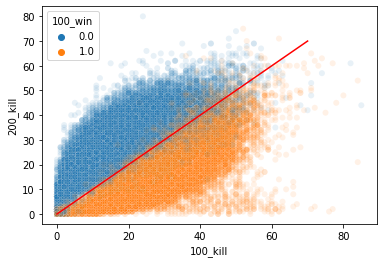

In [60]:
# 양편 kill 대비 승리여부
_ = sns.scatterplot(data = sample_df, x='100_kill', y='200_kill', hue='100_win', alpha = 0.1)
plt.plot([0, 70], [0,70], 'r-')

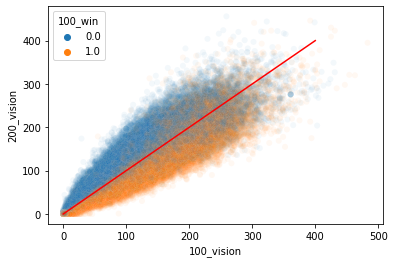

In [61]:
_ = sns.scatterplot(data = sample_df, x='100_vision', y='200_vision', hue='100_win', alpha = 0.05)
plt.plot([0, 400], [0,400], 'r-')

In [104]:
# _ = sns.scatterplot(data = sample_df, x='100_timeCC', y='200_timeCC', hue='100_win', alpha = 0.1)
# plt.plot([0, 400], [0,400], 'r-')

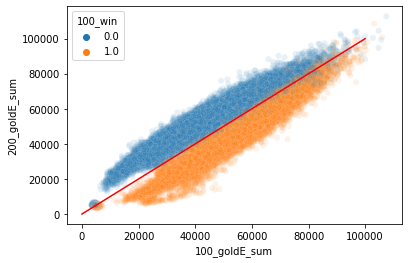

In [62]:
_ = sns.scatterplot(data = sample_df, x='100_goldE_sum', y='200_goldE_sum', hue='100_win', alpha = 0.1)
plt.plot([0, 100000], [0,100000], 'r-')

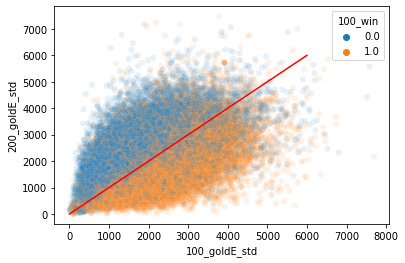

In [63]:
_ = sns.scatterplot(data = sample_df, x='100_goldE_std', y='200_goldE_std', hue='100_win', alpha = 0.1)
plt.plot([0, 6000], [0,6000], 'r-')

c:\programdata\anaconda3\envs\nano1\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


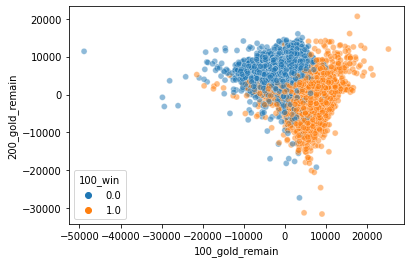

In [64]:
temp = sample_df[['100_win', '100_goldE_sum', '100_goldS','200_goldE_sum', '200_goldS']]
temp['100_gold_remain'] = temp['100_goldE_sum'] - temp['100_goldS']
temp['200_gold_remain'] = temp['200_goldE_sum'] - temp['200_goldS']
_ = sns.scatterplot(data = temp, x='100_gold_remain', y='200_gold_remain', hue='100_win', alpha = 0.5)
# plt.plot([0, 6000], [0,6000], 'r-')

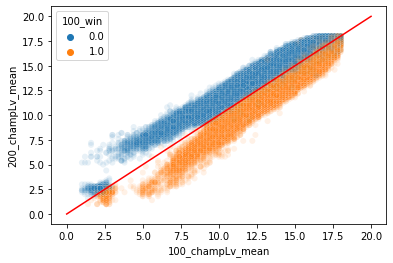

In [65]:
_ = sns.scatterplot(data = sample_df, x='100_champLv_mean', y='200_champLv_mean', hue='100_win', alpha = 0.1)
plt.plot([0, 20], [0,20], 'r-')

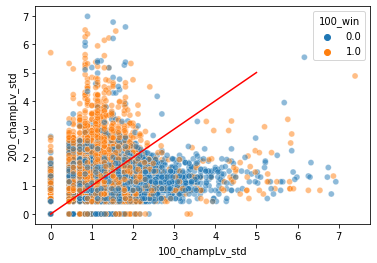

In [110]:
_ = sns.scatterplot(data = sample_df, x='100_champLv_std', y='200_champLv_std', hue='100_win', alpha = 0.5)
plt.plot([0, 5], [0,5], 'r-')

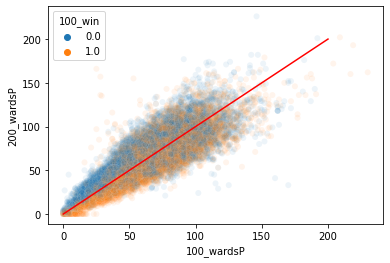

In [609]:
# _ = sns.scatterplot(data = sample_df, x='100_wardsP', y='200_wardsP', hue='100_win', alpha = 0.08)
# plt.plot([0, 200], [0,200], 'r-')

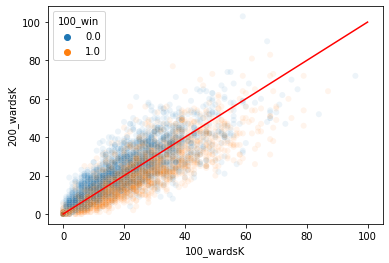

In [406]:
# _ = sns.scatterplot(data = sample_df, x='100_wardsK', y='200_wardsK', hue='100_win', alpha = 0.08)
# plt.plot([0, 100], [0,100], 'r-')

<AxesSubplot:xlabel='100_goldS', ylabel='Count'>

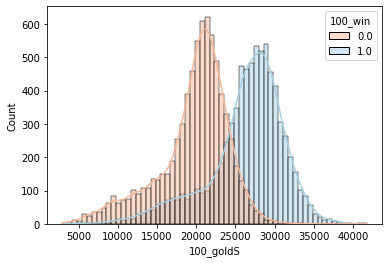

In [69]:
sns.histplot(data= sample_df[sample_df['durationType']==1], x='100_goldS', hue='100_win', palette='RdBu', kde=True)

<AxesSubplot:xlabel='200_goldS', ylabel='Count'>

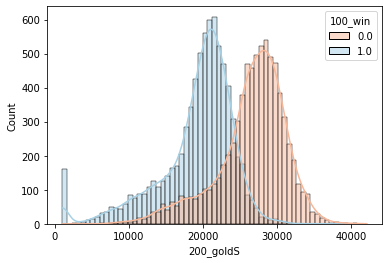

In [70]:
sns.histplot(data= sample_df[sample_df['durationType']==1], x='200_goldS', hue='100_win', palette='RdBu', kde=True)

<AxesSubplot:xlabel='100_goldE_sum', ylabel='Count'>

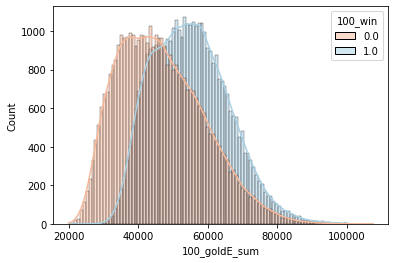

In [92]:
sns.histplot(data= sample_df[sample_df['durationType']==2], x='100_goldE_sum', hue='100_win', palette='RdBu', kde=True)

<AxesSubplot:xlabel='100_goldE_std', ylabel='Count'>

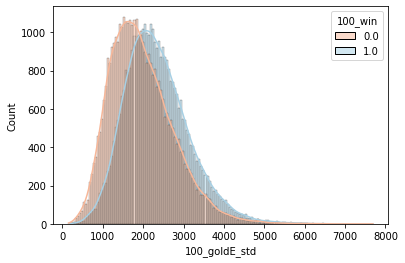

In [93]:
sns.histplot(data= sample_df[sample_df['durationType']==2], x='100_goldE_std', hue='100_win', palette='RdBu', kde=True)

<AxesSubplot:xlabel='200_goldE_sum', ylabel='Count'>

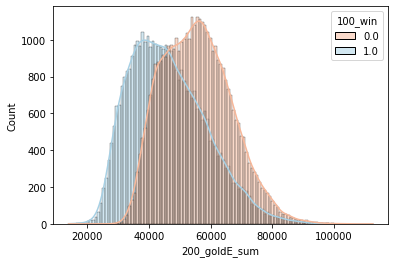

In [91]:
sns.histplot(data= sample_df[sample_df['durationType']==2], x='200_goldE_sum', hue='100_win', palette='RdBu', kde=True)

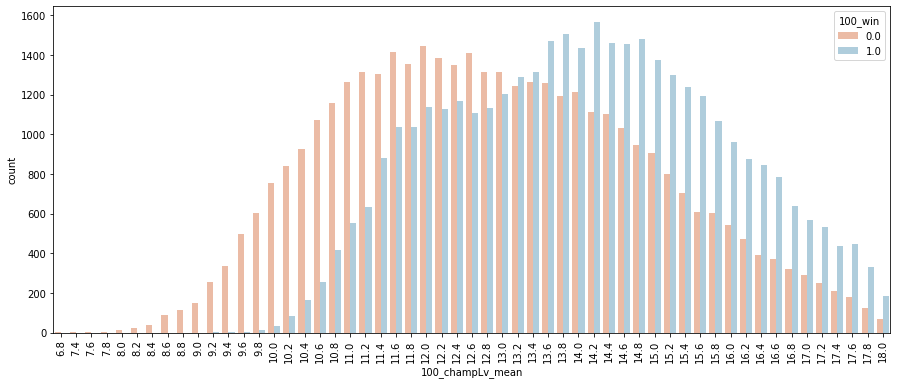

In [87]:
plt.figure(figsize = (15,6))
_ = sns.countplot(data= sample_df[sample_df['durationType'] == 2], x='100_champLv_mean', hue='100_win', palette='RdBu')
plt.xticks(rotation = 90)
plt.show()

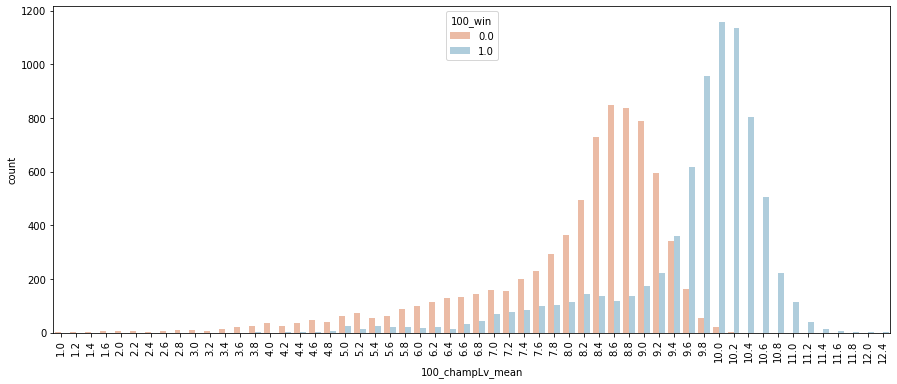

In [88]:
plt.figure(figsize = (15,6))
_ = sns.countplot(data= sample_df[sample_df['durationType'] == 1], x='100_champLv_mean', hue='100_win', palette='RdBu')
plt.xticks(rotation = 90)
plt.show()

### 범주형 데이터 EDA

In [427]:
sample_df.columns

Index(['gameDuration', 'gameId', '100_win', '100_kill', '100_vision',
       '100_timeCC', '100_tTimeCC', '100_goldE_std', '100_goldE_sum',
       '100_goldS', '100_minionK', '100_nMinionK', '100_champLv_mean',
       '100_champLv_std', '100_wardsP', '100_wardsK', '200_win', '200_kill',
       '200_vision', '200_timeCC', '200_tTimeCC', '200_goldE_std',
       '200_goldE_sum', '200_goldS', '200_minionK', '200_nMinionK',
       '200_champLv_mean', '200_champLv_std', '200_wardsP', '200_wardsK',
       '100_firstBlood', '100_firstTower', '100_firstInhibitor',
       '100_firstBaron', '100_firstDragon', '100_firstRiftHerald',
       '100_towerKills', '100_inhibitorKills', '100_baronKills',
       '100_dragonKills', '100_vilemawKills', '100_riftHeraldKills',
       '200_firstBlood', '200_firstTower', '200_firstInhibitor',
       '200_firstBaron', '200_firstDragon', '200_firstRiftHerald',
       '200_towerKills', '200_inhibitorKills', '200_baronKills',
       '200_dragonKills', '200_vilemawKi

<AxesSubplot:xlabel='100_baronKills', ylabel='count'>

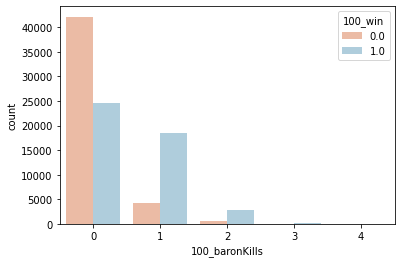

In [76]:
sns.countplot(data= sample_df, x='100_baronKills', hue='100_win', palette='RdBu')

<AxesSubplot:xlabel='100_dragonKills', ylabel='count'>

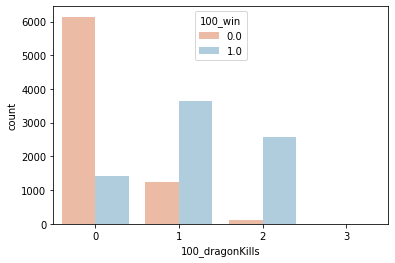

In [78]:
sns.countplot(data= sample_df[sample_df['durationType'] == 1], x='100_dragonKills', hue='100_win', palette='RdBu')

<AxesSubplot:xlabel='100_dragonKills', ylabel='count'>

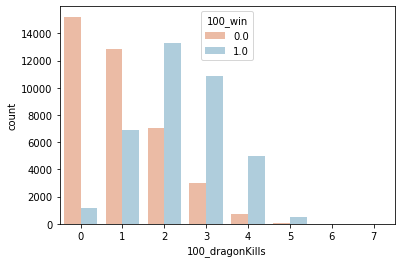

In [79]:
sns.countplot(data= sample_df[sample_df['durationType'] == 2], x='100_dragonKills', hue='100_win', palette='RdBu')

<AxesSubplot:xlabel='100_riftHeraldKills', ylabel='count'>

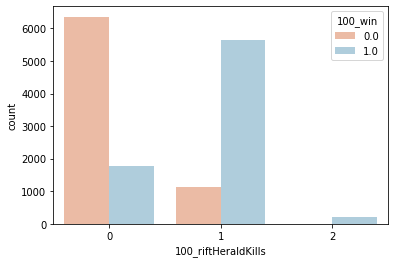

In [80]:
sns.countplot(data= sample_df[sample_df['durationType'] == 1], x='100_riftHeraldKills', hue='100_win', palette='RdBu')

<AxesSubplot:xlabel='100_riftHeraldKills', ylabel='count'>

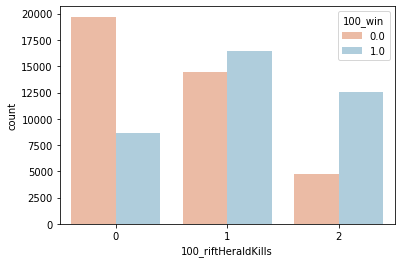

In [81]:
sns.countplot(data= sample_df[sample_df['durationType'] == 2], x='100_riftHeraldKills', hue='100_win', palette='RdBu')

### 상관도 분석

In [96]:
corr_type1 = sample_df[sample_df['durationType'] == 1].corr()
corr_type2 = sample_df[sample_df['durationType'] == 2].corr()

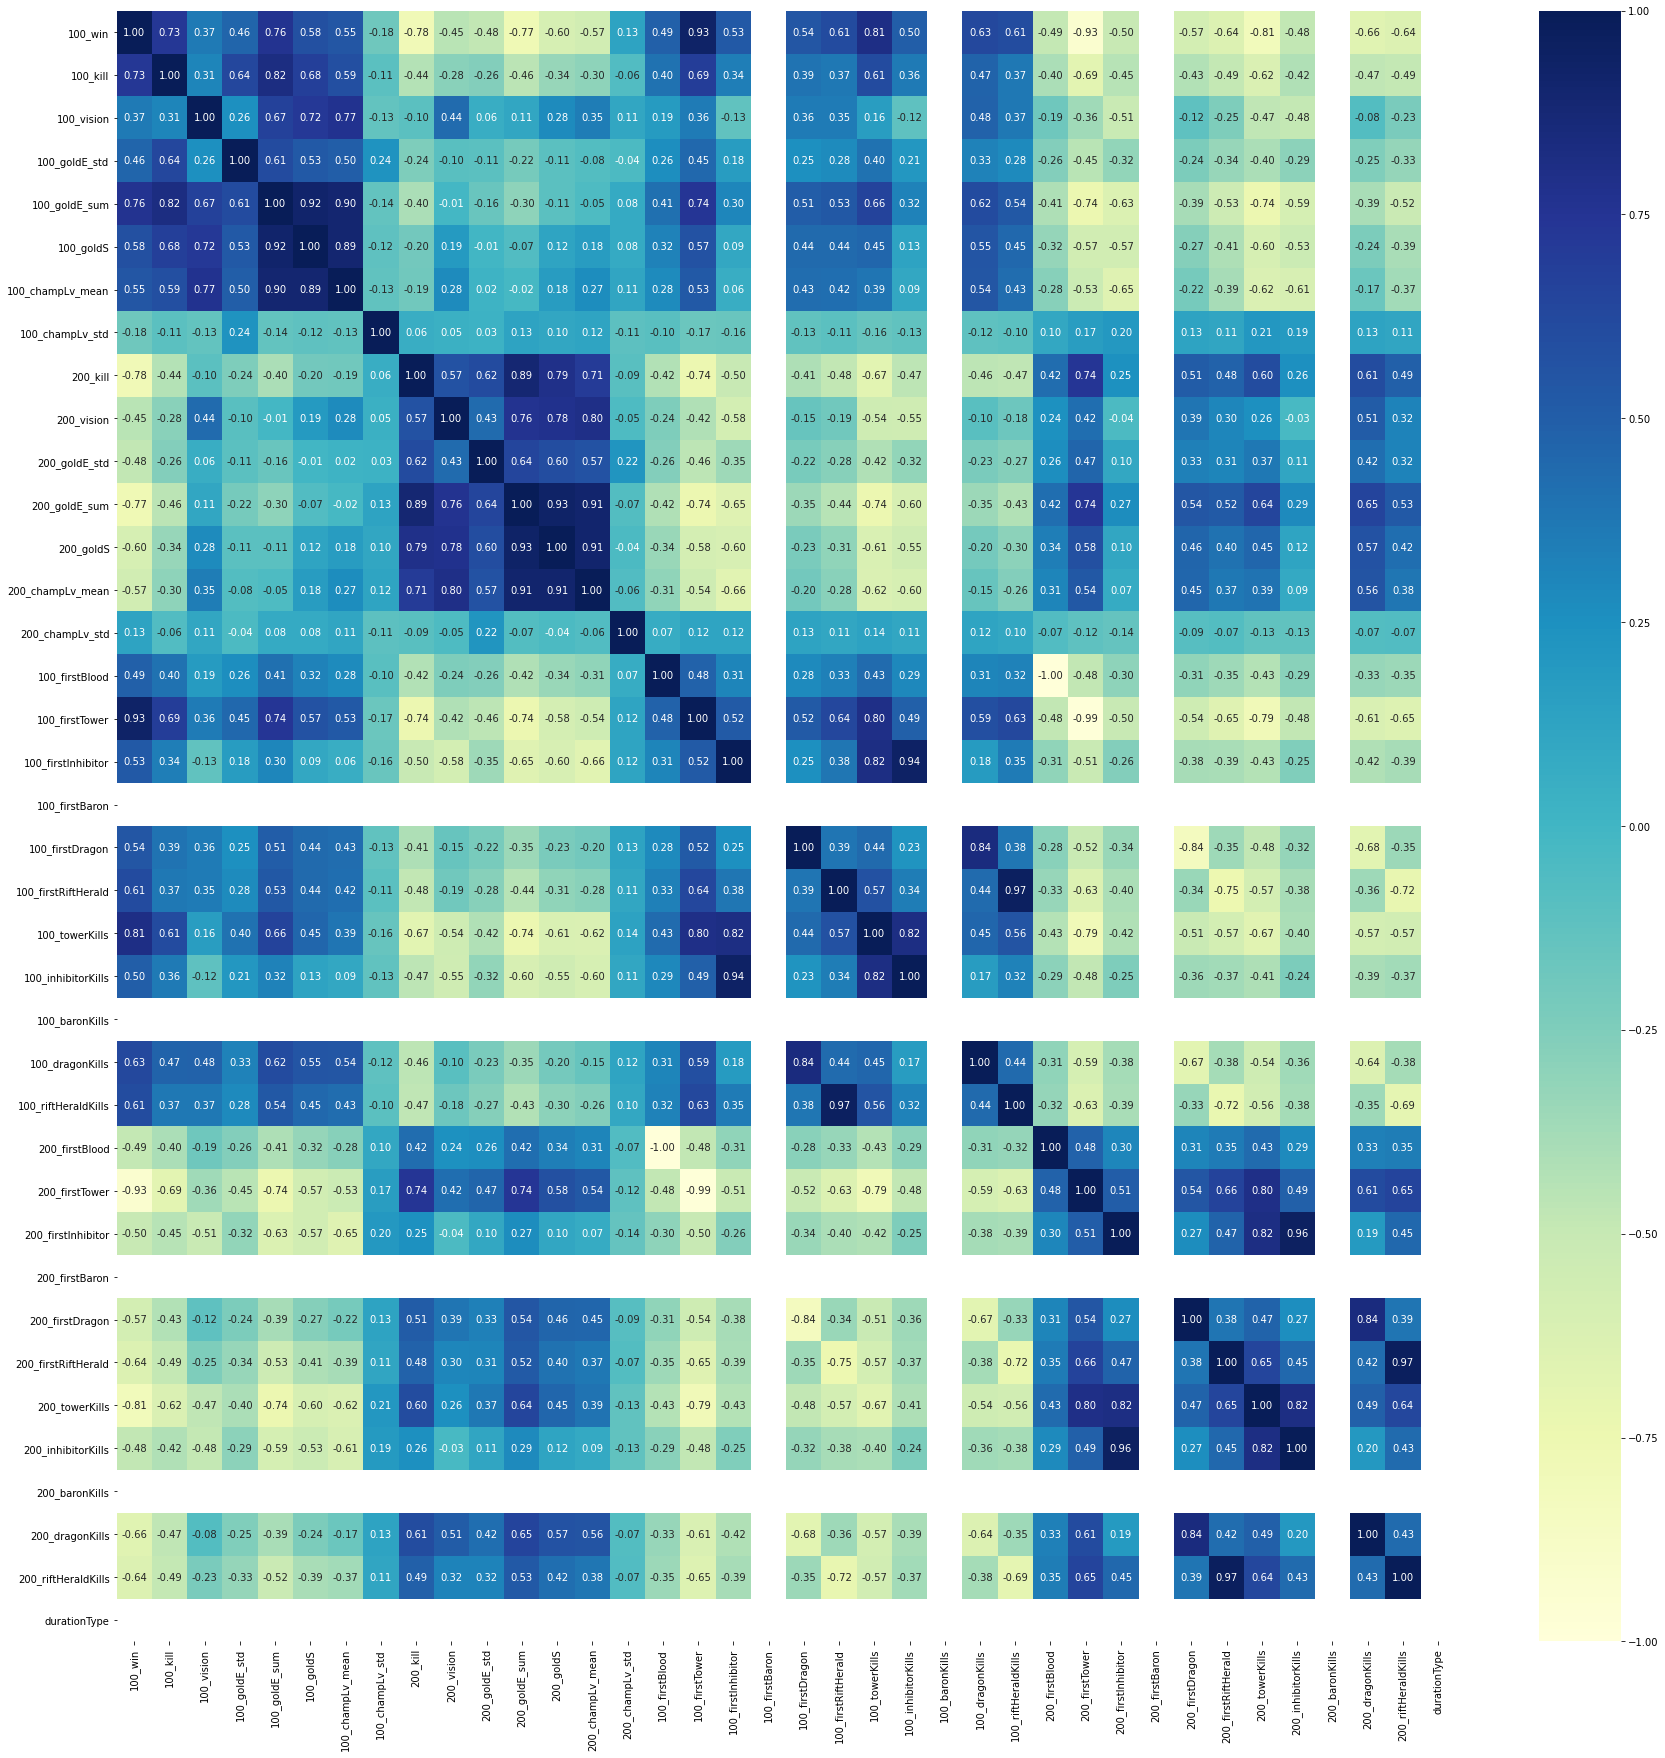

In [97]:
plt.figure(figsize=(30,30))
_ = sns.heatmap(corr_type1, annot = True, fmt = '.2f', cmap='YlGnBu')

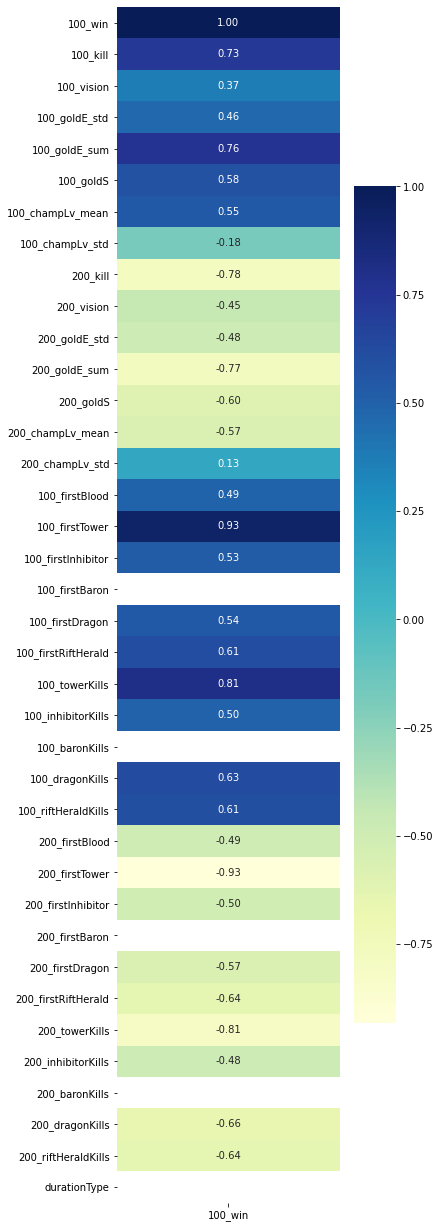

In [98]:
plt.figure(figsize=(5,22))
_ = sns.heatmap(corr_type1[['100_win']], annot = True, fmt = '.2f', cmap='YlGnBu')

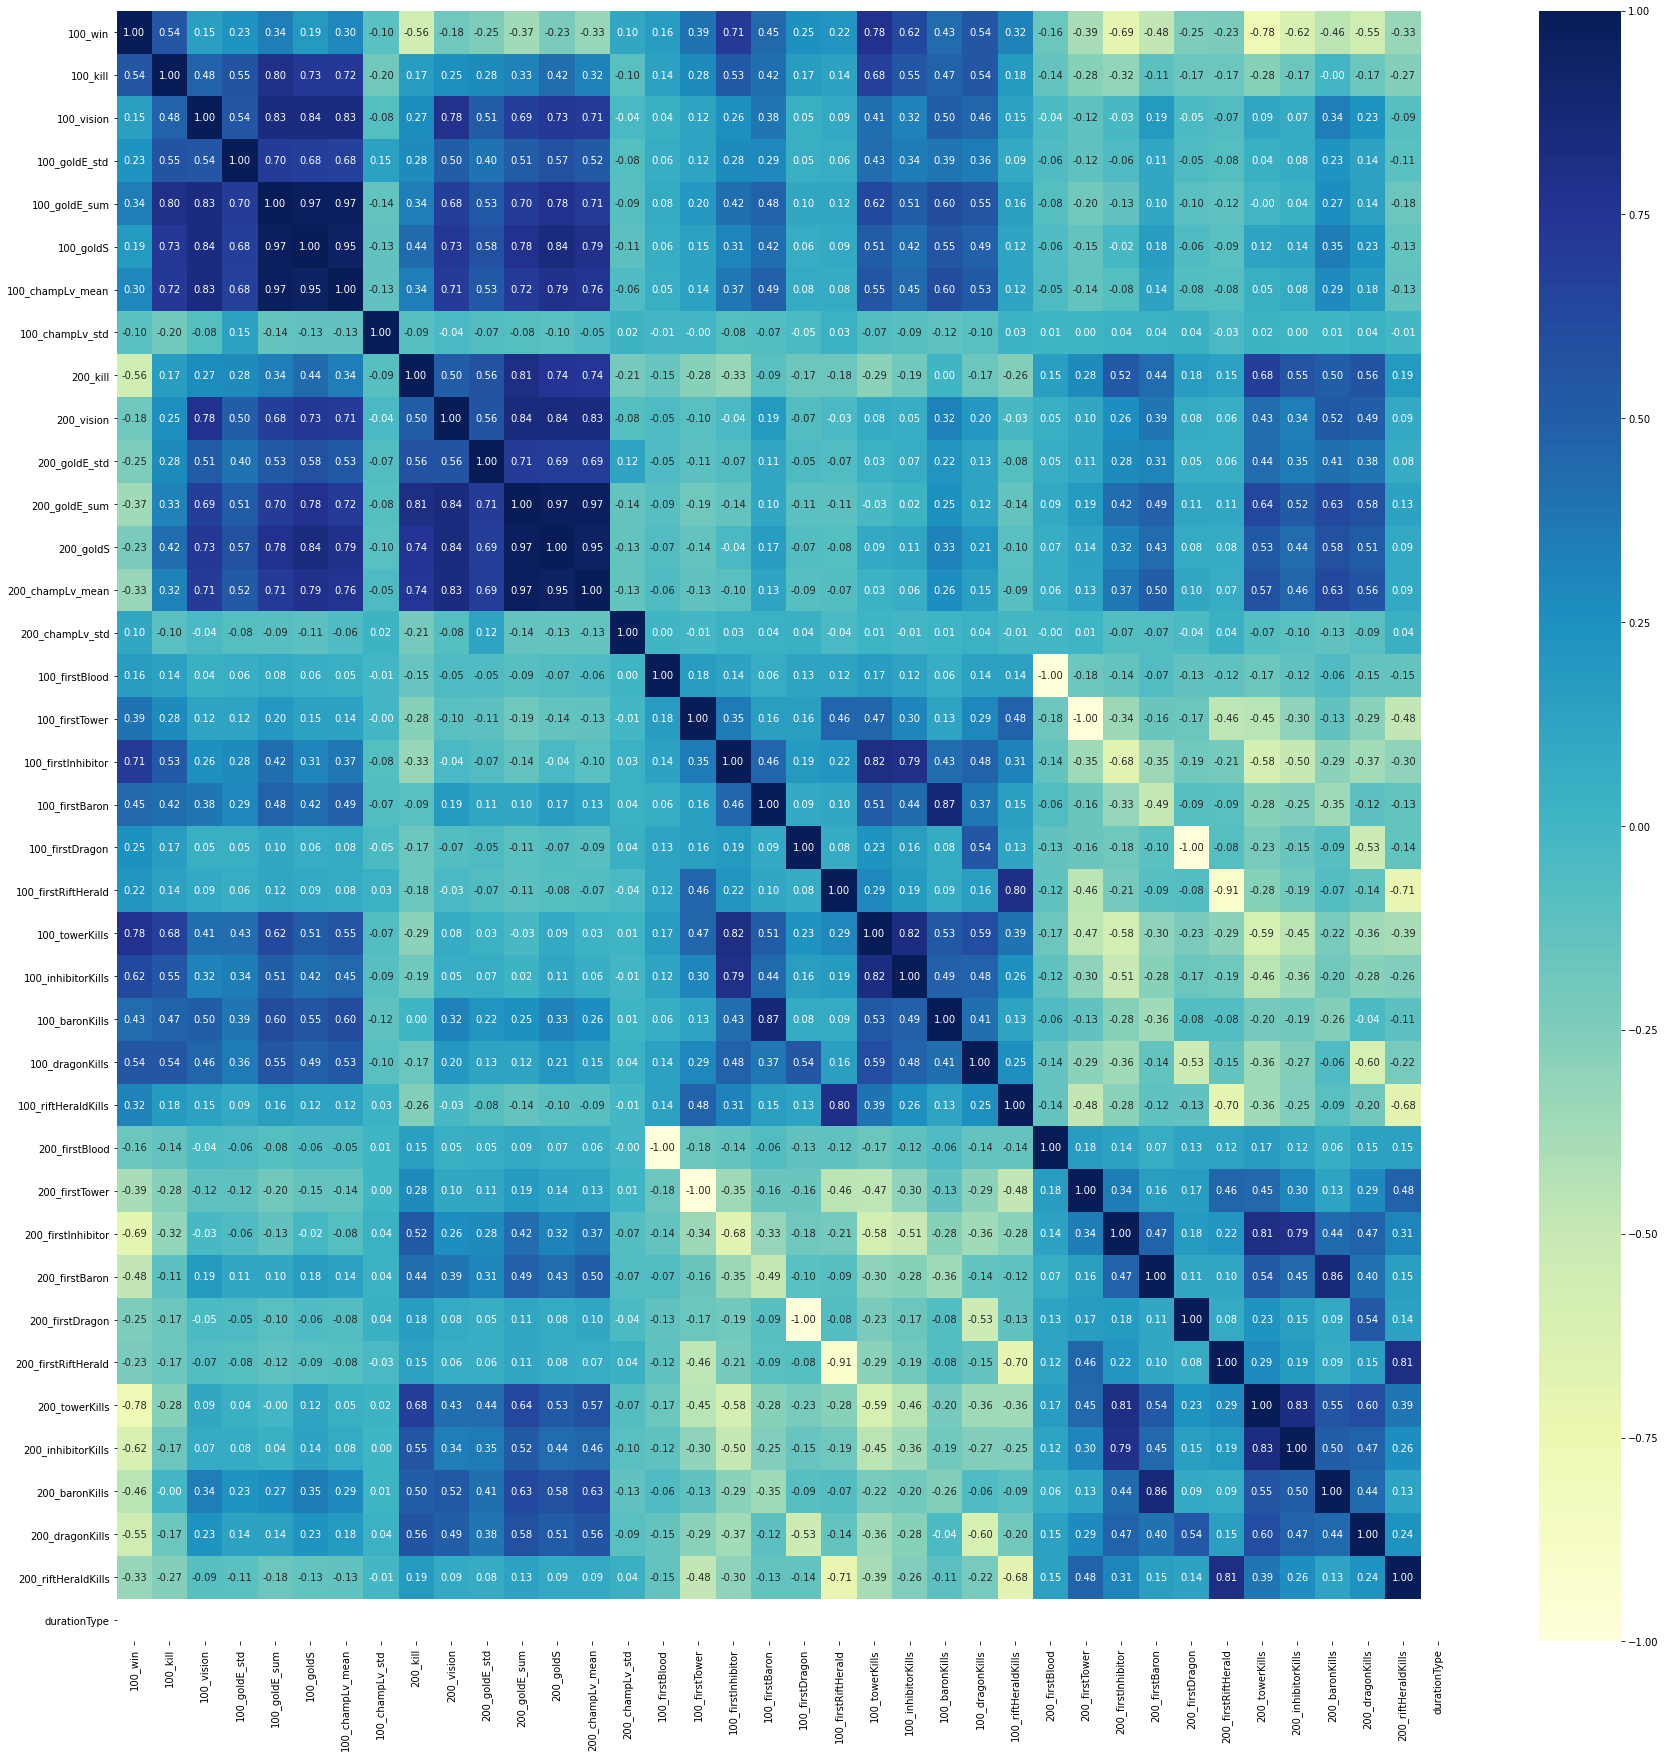

In [99]:
plt.figure(figsize=(30,30))
_ = sns.heatmap(corr_type2, annot = True, fmt = '.2f', cmap='YlGnBu')

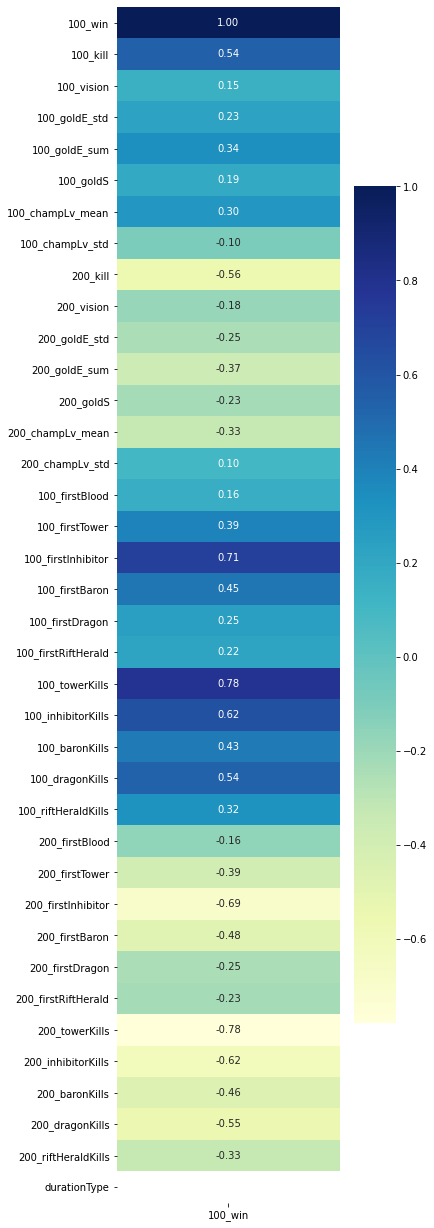

In [100]:
plt.figure(figsize=(5,22))
_ = sns.heatmap(corr_type2[['100_win']], annot = True, fmt = '.2f', cmap='YlGnBu')

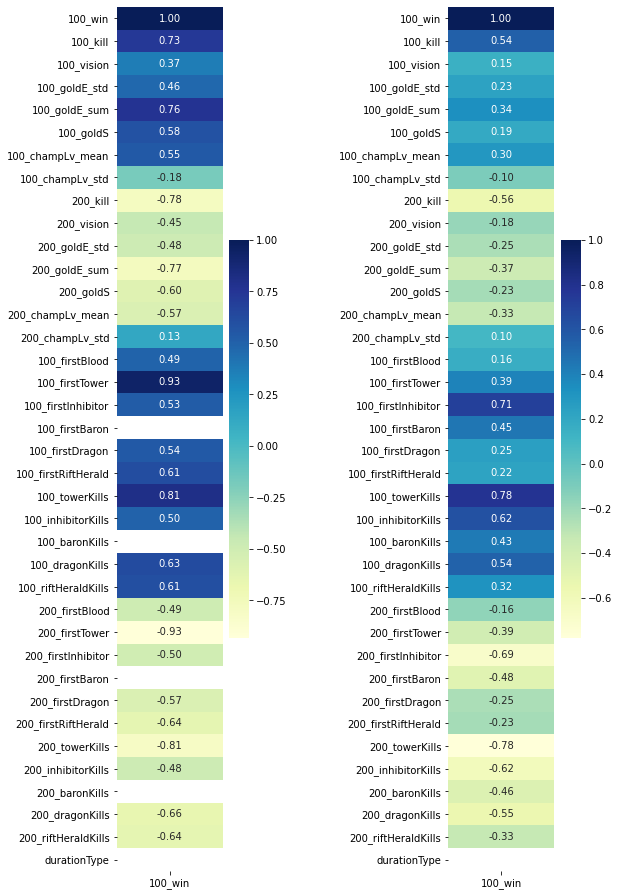

In [205]:
plt.figure(figsize=(6,15))

plt.subplot(121)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.9, wspace=1.5, hspace=0.2)
_ = sns.heatmap(corr_type1[['100_win']], annot = True, fmt = '.2f', cmap='YlGnBu')


plt.subplot(122)
_ = sns.heatmap(corr_type2[['100_win']], annot = True, fmt = '.2f', cmap='YlGnBu')

In [113]:
sample_df.head()

,100_win,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,200_kill,200_vision,...,200_firstInhibitor,200_firstBaron,200_firstDragon,200_firstRiftHerald,200_towerKills,200_inhibitorKills,200_baronKills,200_dragonKills,200_riftHeraldKills,durationType
0,0.00,15,91,1420.63,37001,35847,11.20,1.30,31,120,...,True,False,True,True,9,1,0,3,2,2
1,1.00,19,125,1468.91,41072,34960,12.60,1.14,8,111,...,False,False,False,False,2,0,0,0,0,2
2,0.00,5,52,1066.30,22929,21985,8.40,1.14,20,74,...,True,False,True,True,5,1,0,2,2,1
3,0.00,26,249,2593.17,63447,61925,16.00,1.22,36,243,...,False,False,False,True,6,0,1,3,1,2
4,1.00,27,278,2974.51,74955,71580,16.60,1.67,40,237,...,False,False,False,False,6,1,1,3,0,2


In [496]:
sample_df.columns

Index(['gameDuration', 'gameId', '100_win', '100_kill', '100_vision',
       '100_timeCC', '100_tTimeCC', '100_goldE_std', '100_goldE_sum',
       '100_goldS', '100_minionK', '100_nMinionK', '100_champLv_mean',
       '100_champLv_std', '100_wardsP', '100_wardsK', '200_win', '200_kill',
       '200_vision', '200_timeCC', '200_tTimeCC', '200_goldE_std',
       '200_goldE_sum', '200_goldS', '200_minionK', '200_nMinionK',
       '200_champLv_mean', '200_champLv_std', '200_wardsP', '200_wardsK',
       '100_firstBlood', '100_firstTower', '100_firstInhibitor',
       '100_firstBaron', '100_firstDragon', '100_firstRiftHerald',
       '100_towerKills', '100_inhibitorKills', '100_baronKills',
       '100_dragonKills', '100_riftHeraldKills', '200_firstBlood',
       '200_firstTower', '200_firstInhibitor', '200_firstBaron',
       '200_firstDragon', '200_firstRiftHerald', '200_towerKills',
       '200_inhibitorKills', '200_baronKills', '200_dragonKills',
       '200_riftHeraldKills', 'durationTy

In [114]:
num_col = ['100_kill', '100_vision',
       #'100_timeCC', '100_tTimeCC',
       '100_goldE_std', '100_goldE_sum','100_goldS',
       #'100_minionK', '100_nMinionK',
       '100_champLv_mean', '100_champLv_std',
       #'100_wardsP', '100_wardsK',
       '200_kill', '200_vision',
       #'200_timeCC', '200_tTimeCC',
       '200_goldE_std', '200_goldE_sum', '200_goldS',
       #'200_minionK', '200_nMinionK',
       '200_champLv_mean', '200_champLv_std', 
       #'200_wardsP', '200_wardsK',
       '100_towerKills', '100_inhibitorKills', '100_baronKills',
       '100_dragonKills', '100_riftHeraldKills','200_towerKills',
       '200_inhibitorKills', '200_baronKills', '200_dragonKills',
       '200_riftHeraldKills'
        ]

cate_col = ['100_firstBlood', '100_firstTower', '100_firstInhibitor',
           '100_firstBaron', '100_firstDragon', '100_firstRiftHerald',
           '200_firstBlood', '200_firstTower', '200_firstInhibitor', 
            '200_firstBaron','200_firstDragon', '200_firstRiftHerald']

target_col = ['100_win']

## 승패 예측 모델링

### light Gradient Boosting Model

In [115]:
duration_df1 = sample_df[sample_df['durationType'] == 1].reset_index(drop = True)
duration_df2 = sample_df[sample_df['durationType'] == 2].reset_index(drop = True)

In [116]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

In [117]:
duration_df1[num_col]

,100_kill,100_vision,100_goldE_std,100_goldE_sum,100_goldS,100_champLv_mean,100_champLv_std,200_kill,200_vision,200_goldE_std,...,100_towerKills,100_inhibitorKills,100_baronKills,100_dragonKills,100_riftHeraldKills,200_towerKills,200_inhibitorKills,200_baronKills,200_dragonKills,200_riftHeraldKills
0,5,52,1066.30,22929,21985,8.40,1.14,20,74,1164.55,...,0,0,0,0,0,5,1,0,2,2
1,26,97,1445.46,36545,30710,10.60,0.89,3,69,711.30,...,5,0,0,2,1,0,0,0,0,0
2,11,90,1384.94,31868,28785,10.40,1.67,2,83,743.28,...,4,0,0,2,0,1,0,0,0,1
3,4,69,842.52,23844,20350,8.80,1.30,17,83,587.28,...,0,0,0,1,0,4,0,0,1,1
4,1,70,863.40,23282,20710,9.20,1.30,12,79,909.20,...,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,7,17,1064.47,16095,14575,5.60,2.30,18,26,1011.94,...,0,0,0,0,0,8,1,0,0,1
15142,28,44,1756.98,33836,29737,10.40,1.14,12,34,1213.98,...,3,0,0,2,1,0,0,0,0,0
15143,10,36,887.23,21246,30310,7.40,0.55,20,51,1263.19,...,0,0,0,0,1,7,1,0,2,0
15144,8,59,825.83,23269,23104,8.60,1.34,19,58,1014.76,...,0,0,0,0,0,2,0,0,1,1


In [118]:
scaler = StandardScaler()

x_num = duration_df1[num_col]
scaler.fit(x_num)
x_scaled = scaler.transform(x_num)

x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns = x_num.columns)

x_cat = duration_df1[cate_col].reset_index(drop = True)

X1 = pd.concat([x_scaled,x_cat], axis = 1)
y1 = duration_df1['100_win']

In [122]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=910)

In [120]:
scaler = StandardScaler()

x_num = duration_df2[num_col]
scaler.fit(x_num)
x_scaled = scaler.transform(x_num)

x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns = x_num.columns)

x_cat = duration_df2[cate_col].reset_index(drop = True)

X2 = pd.concat([x_scaled,x_cat], axis = 1)
y2 = duration_df2['100_win']

In [123]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=910)

In [125]:
lgbm = LGBMClassifier()
# parameters = {
# #     'min_data_in_leaf' : [10, 20, 30],
# #     'min_gain_to_split ' : [5,10,30],
#     'boosting_type' : ['gbdt', 'dart'],
#     'learning_rate' : [0.3, 0.01, 0.001],
# }

parameters = {
            'max_depth' : [3,5],
            'num_leaves' : [32,64,128],
            'min_data_in_leaf' : [1,5,10],
            'colsample_bytree' : [0.8, 1],
            'n_estimators' : [100,150]}

GS_light = GridSearchCV(lgbm, parameters, cv = 10, scoring = 'accuracy')
GS_light.fit(X1_train, y1_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.8, 1], 'max_depth': [3, 5],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

In [126]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GS_light.cv_results_['mean_test_score']
stds = GS_light.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_light.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.999 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 100, 'num_leaves': 32}
0.999 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 100, 'num_leaves': 64}
0.999 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 100, 'num_leaves': 128}
1.000 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 150, 'num_leaves': 32}
1.000 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 150, 'num_leaves': 64}
1.000 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 150, 'num_leaves': 128}
0.999 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 5, 'n_estimators': 100, 'num_leaves': 32}
0.999 (+/-0.001) for {'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 5, 'n_estimators': 100, 'num_leaves': 64

In [127]:
print(GS_light.best_params_)
print(GS_light.best_score_)

{'colsample_bytree': 0.8, 'max_depth': 3, 'min_data_in_leaf': 1, 'n_estimators': 150, 'num_leaves': 32}
0.9996226415094341


* DurationType 1 (under 1020) 정확도 확인

In [130]:
pred = GS_light.predict(X1_test)

print(classification_report(y1_test, pred))
print(confusion_matrix(y1_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2248
         1.0       1.00      1.00      1.00      2296

    accuracy                           1.00      4544
   macro avg       1.00      1.00      1.00      4544
weighted avg       1.00      1.00      1.00      4544

[[2247    1]
 [   2 2294]]


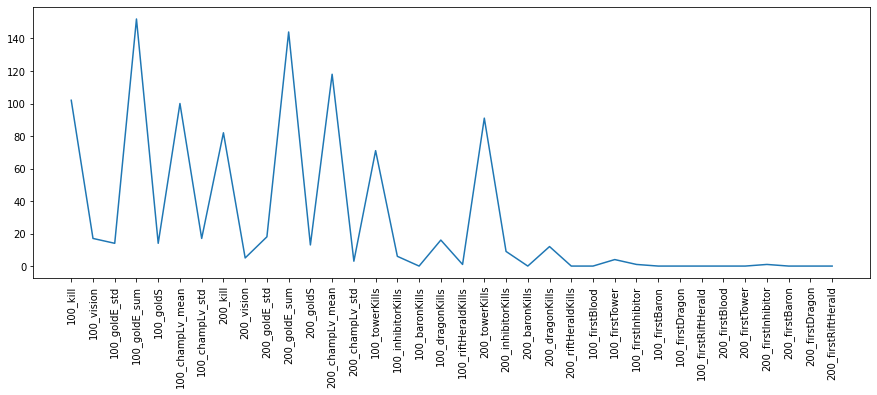

In [129]:
plt.figure(figsize = (15,5))
plt.plot(X1.columns, GS_light.best_estimator_.feature_importances_)

plt.xticks(rotation = 90)
plt.show()

In [131]:
lgbm = LGBMClassifier()

parameters = {
            'max_depth' : [3,5],
            'num_leaves' : [32,64,128],
            'min_data_in_leaf' : [1,5,10],
            'colsample_bytree' : [0.8, 1],
            'n_estimators' : [100,150]}

GS_light2 = GridSearchCV(lgbm, parameters, cv = 10, scoring = 'accuracy')
GS_light2.fit(X2_train, y2_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.8, 1], 'max_depth': [3, 5],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

* DurationType 2 (over 1020) 정확도 확인

In [132]:
pred = GS_light2.predict(X2_test)

print(classification_report(y2_test, pred))
print(confusion_matrix(y2_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11653
         1.0       0.99      0.99      0.99     11353

    accuracy                           0.99     23006
   macro avg       0.99      0.99      0.99     23006
weighted avg       0.99      0.99      0.99     23006

[[11577    76]
 [   73 11280]]


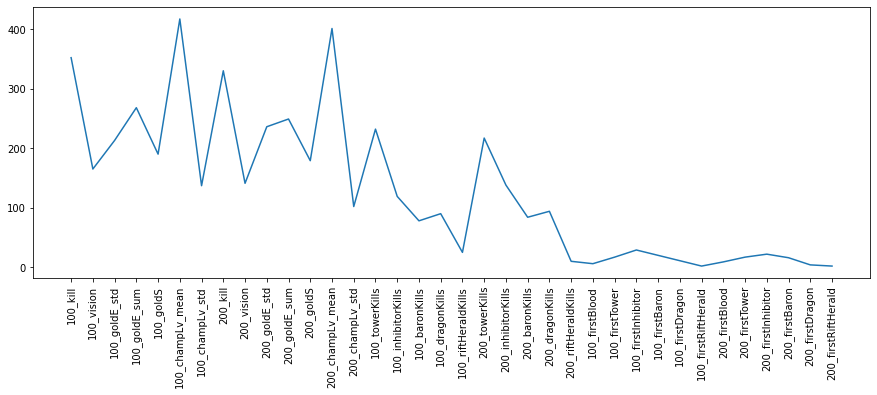

In [133]:
plt.figure(figsize = (15,5))
plt.plot(X2.columns, GS_light2.best_estimator_.feature_importances_)

plt.xticks(rotation = 90)
plt.show()

#### feature importance 분석

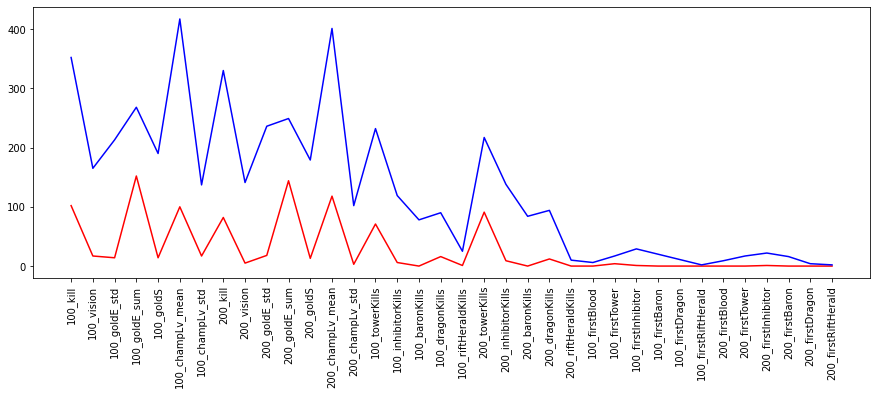

In [134]:
plt.figure(figsize = (15,5))

plt.plot(X1.columns, GS_light.best_estimator_.feature_importances_, 'r-')
plt.plot(X2.columns, GS_light2.best_estimator_.feature_importances_, 'b-')
plt.xticks(rotation = 90)

plt.show()

In [135]:
light_fi = pd.DataFrame(GS_light.best_estimator_.feature_importances_, index= X1.columns)
light_fi[0] = light_fi[0].transform(lambda x : (x - x.min()) / (x.max() - x.min()))

light2_fi = pd.DataFrame(GS_light2.best_estimator_.feature_importances_, index= X2.columns)
light2_fi[0] = light2_fi[0].transform(lambda x : (x - x.min()) / (x.max() - x.min()))

* 두 그룹의 모델링을 각기하여 정규화 시킨 feature importance 비교

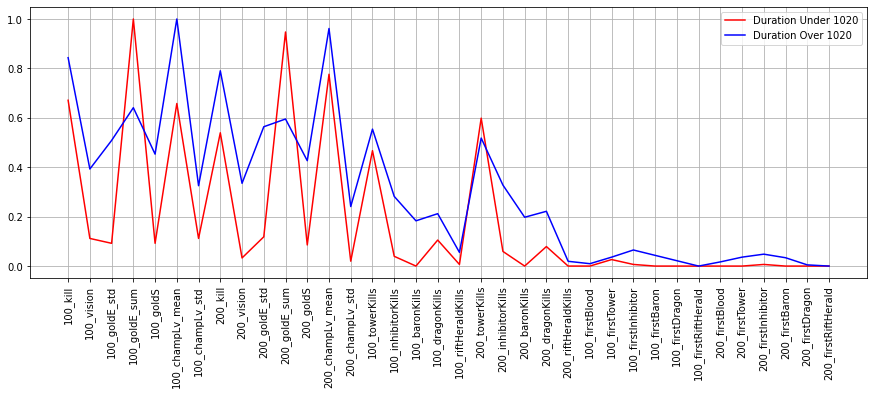

In [157]:
plt.figure(figsize = (15,5))

plt.plot(light_fi.index, light_fi[0], 'r-', label='Duration Under 1020')
plt.plot(light2_fi.index, light2_fi[0], 'b-', label = 'Duration Over 1020')
plt.xticks(rotation = 90)
plt.grid()
plt.legend()
plt.show()

## feature_importances 는 상대지표가 아닌가?

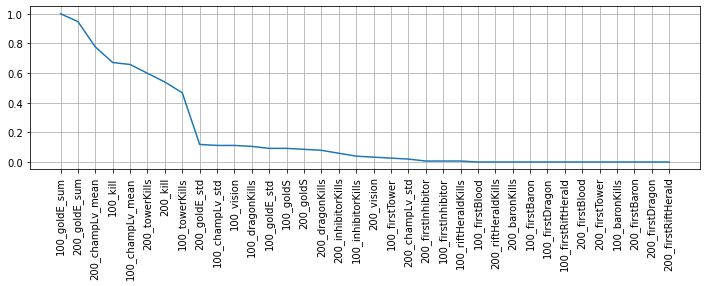

In [184]:
# durationType 1 (under 1020) 의 피쳐중요도 순 나열

plt.figure(figsize = (12,3))
plt.plot(light_fi[0].sort_values(ascending=False).index, light_fi[0].sort_values(ascending = False))
plt.xticks(rotation = 90)
plt.grid()
plt.show()

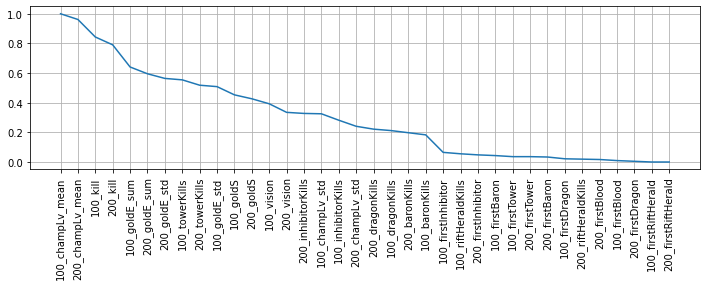

In [185]:
# durationType 2 (over 1020) 의 피쳐중요도 순 나열
plt.figure(figsize = (12, 3))
plt.plot(light2_fi[0].sort_values(ascending=False).index, light2_fi[0].sort_values(ascending = False))
plt.xticks(rotation = 90)
plt.grid()
plt.show()

#### ROC 그래프

In [159]:
from sklearn.metrics import plot_roc_curve

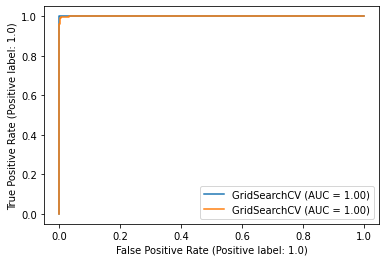

In [160]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(GS_light, X1_test, y1_test, ax= ax)
plot_roc_curve(GS_light2, X2_test, y2_test, ax= ax)

### Linear Regression


In [161]:
lg = LogisticRegression()
parameters_lg = {
    'penalty' : ['l1','l2'],
    'solver' : ['lbfgs', 'liblinear'],
    'tol': [0.01, 0.1 , 1],
}

GS_lg = GridSearchCV(lg, parameters_lg, cv = 10, scoring = 'accuracy')
GS_lg.fit(X1_train, y1_train)

c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\programdata\anaconda3\

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.1, 1]},
             scoring='accuracy')

In [162]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GS_lg.cv_results_['mean_test_score']
stds = GS_lg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_lg.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.01}
nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
0.999 (+/-0.002) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
0.997 (+/-0.005) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
0.971 (+/-0.047) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
0.999 (+/-0.001) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
0.999 (+/-0.001) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.1}
0.999 (+/-0.001) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1}
1.000 (+/-0.001) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.01}
0.998 (+/-0.002) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.1}
0.995 (+/-0.004) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 1}



In [163]:
pred = GS_lg.predict(X1_test)

print(classification_report(y1_test, pred))
print(confusion_matrix(y1_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2248
         1.0       1.00      1.00      1.00      2296

    accuracy                           1.00      4544
   macro avg       1.00      1.00      1.00      4544
weighted avg       1.00      1.00      1.00      4544

[[2247    1]
 [   1 2295]]


In [164]:
lg = LogisticRegression()
parameters_lg = {
    'penalty' : ['l1','l2'],
    'solver' : ['lbfgs', 'liblinear'],
    'tol': [0.01, 0.1 , 1],
}

GS_lg2 = GridSearchCV(lg, parameters_lg, cv = 10, scoring = 'accuracy')
GS_lg2.fit(X2_train, y2_train)

c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\programdata\anaconda3\envs\nano1\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\programdata\anaconda3\

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.1, 1]},
             scoring='accuracy')

In [165]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GS_lg2.cv_results_['mean_test_score']
stds = GS_lg2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_lg2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.01}
nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
nan (+/-nan) for {'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
0.989 (+/-0.004) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
0.979 (+/-0.007) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
0.952 (+/-0.025) for {'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
0.994 (+/-0.001) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
0.995 (+/-0.001) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.1}
0.994 (+/-0.002) for {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1}
0.993 (+/-0.002) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.01}
0.987 (+/-0.002) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.1}
0.971 (+/-0.016) for {'penalty': 'l2', 'solver': 'liblinear', 'tol': 1}



In [166]:
pred = GS_lg2.predict(X2_test)

print(classification_report(y2_test, pred))
print(confusion_matrix(y2_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11653
         1.0       0.99      1.00      0.99     11353

    accuracy                           0.99     23006
   macro avg       0.99      0.99      0.99     23006
weighted avg       0.99      0.99      0.99     23006

[[11587    66]
 [   55 11298]]


#### feature importance 분석

In [175]:
lg_fi = pd.DataFrame(GS_lg.best_estimator_.coef_, columns= X1.columns).transpose()
lg_fi[0] = light_fi[0].transform(lambda x : (x - x.min()) / (x.max() - x.min()))

lg2_fi = pd.DataFrame(GS_lg2.best_estimator_.coef_, columns= X2.columns).transpose()
lg2_fi[0] = light2_fi[0].transform(lambda x : (x - x.min()) / (x.max() - x.min()))

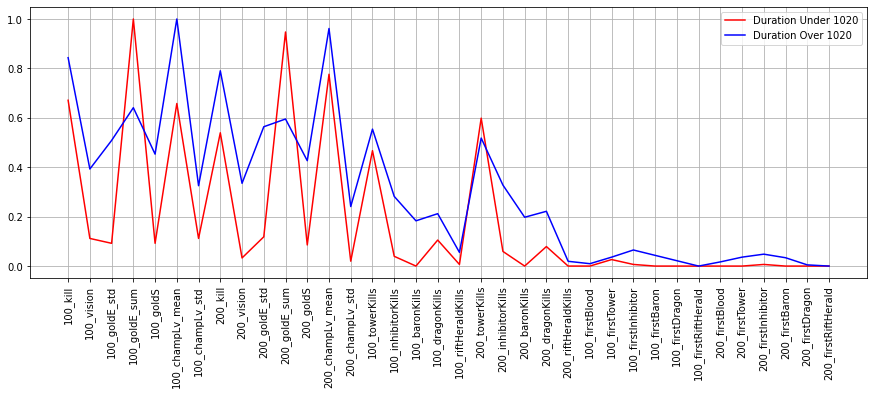

In [176]:
plt.figure(figsize = (15,5))

plt.plot(lg_fi.index, lg_fi[0], 'r-', label='Duration Under 1020')
plt.plot(lg2_fi.index, lg2_fi[0], 'b-', label = 'Duration Over 1020')
plt.xticks(rotation = 90)
plt.grid()
plt.legend()
plt.show()

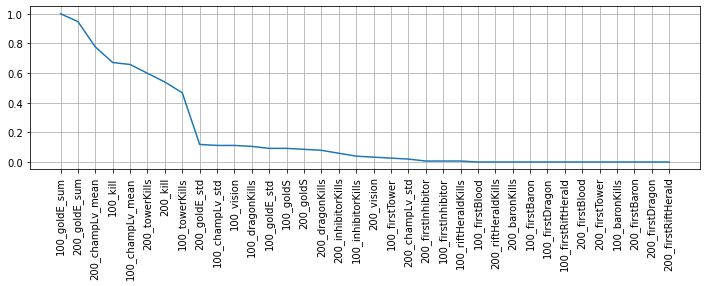

In [182]:
# durationType 1 (under 1020) 의 피쳐중요도 순 나열

plt.figure(figsize = (12,3))
plt.plot(lg_fi[0].sort_values(ascending=False).index, lg_fi[0].sort_values(ascending = False))
plt.xticks(rotation = 90)
plt.grid()
plt.show()

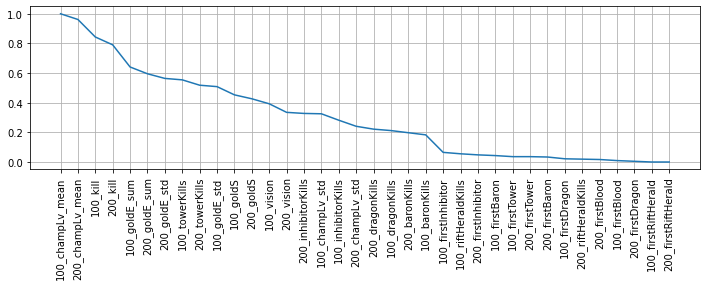

In [183]:
# durationType 2 (over 1020) 의 피쳐중요도 순 나열
plt.figure(figsize = (12,3))
plt.plot(lg2_fi[0].sort_values(ascending=False).index, lg2_fi[0].sort_values(ascending = False))
plt.xticks(rotation = 90)
plt.grid()
plt.show()